# Void Generator Test

Test the void generator with different parameter configurations and visualize results in a 3x3 grid.

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Add src to path
sys.path.append(str(Path.cwd().parent))

from src.data_generation.void_generator import VoidGenerator

In [2]:
# Initialize generator
base_image_dir = Path("../data/base_chips")
generator = VoidGenerator(base_image_dir)

Loaded 5 base chip images


In [3]:
# Define 9 test parameter sets with varying configurations
test_params = [
    # Row 1: Circles with varying counts
    {
        'void_shape': 'circle',
        'void_count': 3,
        'base_size': 15.0,
        'brightness_factor': 0.5,
        'size_std': 3.0,
        'position_spread': 0.6
    },
    {
        'void_shape': 'circle',
        'void_count': 8,
        'base_size': 12.0,
        'brightness_factor': 0.5,
        'size_std': 3.0,
        'position_spread': 0.7
    },
    {
        'void_shape': 'circle',
        'void_count': 15,
        'base_size': 8.0,
        'brightness_factor': 0.5,
        'size_std': 2.0,
        'position_spread': 0.8
    },
    
    # Row 2: Ellipses with varying sizes
    {
        'void_shape': 'ellipse',
        'void_count': 5,
        'base_size': 10.0,
        'brightness_factor': 0.4,
        'size_std': 2.0,
        'position_spread': 0.6
    },
    {
        'void_shape': 'ellipse',
        'void_count': 5,
        'base_size': 20.0,
        'brightness_factor': 0.4,
        'size_std': 5.0,
        'position_spread': 0.6
    },
    {
        'void_shape': 'ellipse',
        'void_count': 5,
        'base_size': 30.0,
        'brightness_factor': 0.4,
        'size_std': 8.0,
        'position_spread': 0.6
    },
    
    # Row 3: Irregular with varying brightness
    {
        'void_shape': 'irregular',
        'void_count': 6,
        'base_size': 18.0,
        'brightness_factor': 0.3,
        'size_std': 5.0,
        'position_spread': 0.7
    },
    {
        'void_shape': 'irregular',
        'void_count': 6,
        'base_size': 18.0,
        'brightness_factor': 0.5,
        'size_std': 5.0,
        'position_spread': 0.7
    },
    {
        'void_shape': 'irregular',
        'void_count': 6,
        'base_size': 18.0,
        'brightness_factor': 0.7,
        'size_std': 5.0,
        'position_spread': 0.7
    }
]

In [4]:
# Generate 9 images
images = []
metadata_list = []

for i, params in enumerate(test_params):
    img, metadata = generator.generate_single(params, seed=i)
    images.append(img)
    metadata_list.append(metadata)

print(f"Generated {len(images)} images")

Generated 9 images


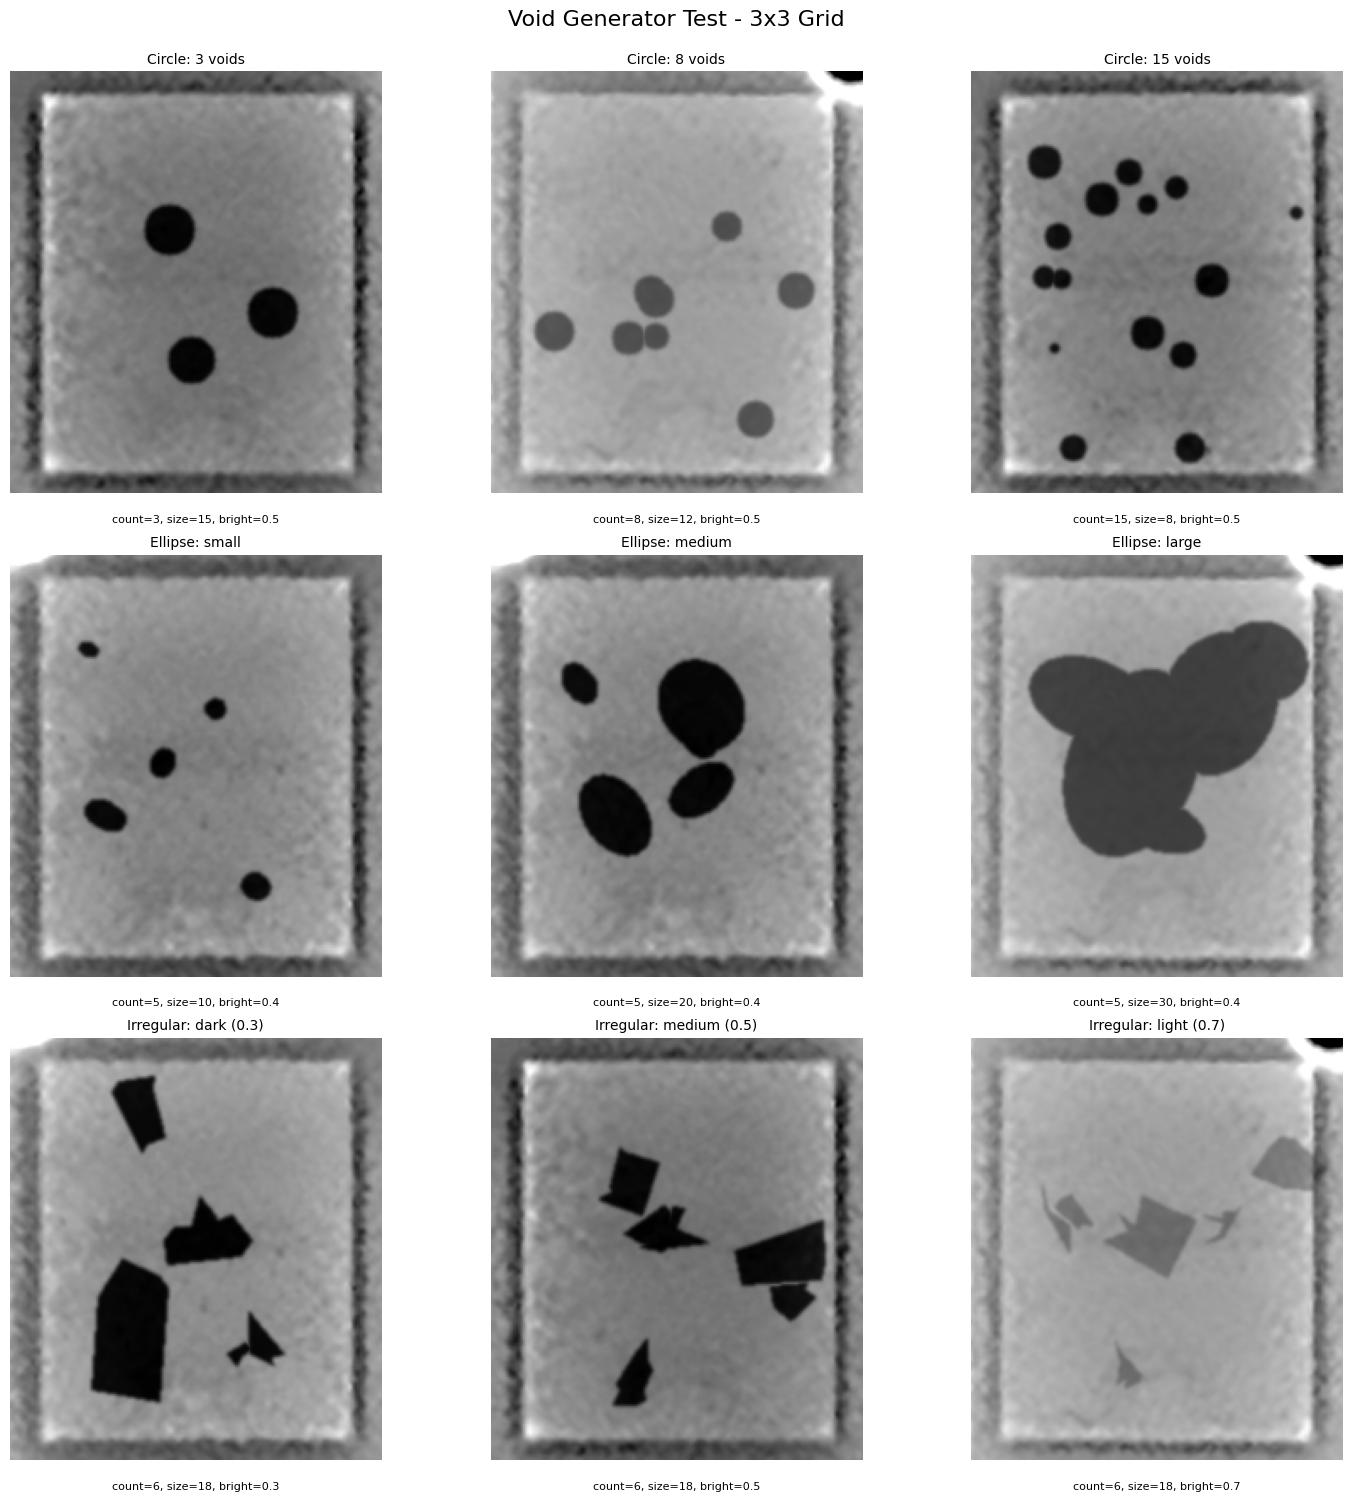

In [5]:
# Display in 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Void Generator Test - 3x3 Grid', fontsize=16, y=0.995)

titles = [
    # Row 1: Circles
    'Circle: 3 voids',
    'Circle: 8 voids',
    'Circle: 15 voids',
    # Row 2: Ellipses
    'Ellipse: small',
    'Ellipse: medium',
    'Ellipse: large',
    # Row 3: Irregular
    'Irregular: dark (0.3)',
    'Irregular: medium (0.5)',
    'Irregular: light (0.7)'
]

for idx, (ax, img, title) in enumerate(zip(axes.flat, images, titles)):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=10)
    ax.axis('off')
    
    # Add parameter info as text
    params = test_params[idx]
    info_text = f"count={params['void_count']}, size={params['base_size']:.0f}, bright={params['brightness_factor']}"
    ax.text(0.5, -0.05, info_text, transform=ax.transAxes, 
            fontsize=8, ha='center', va='top')

plt.tight_layout()
plt.show()

In [6]:
# Print metadata for one sample
print("Sample metadata (image 0):")
import json
print(json.dumps(metadata_list[0], indent=2))

Sample metadata (image 0):
{
  "params": {
    "void_shape": "circle",
    "void_count": 3,
    "base_size": 15.0,
    "brightness_factor": 0.5,
    "size_std": 3.0,
    "position_spread": 0.6
  },
  "seed": 0,
  "base_image_id": "NoVoids_53438_0023_result.png",
  "base_image_idx": 4,
  "uncontrolled_params": {
    "rotation": 213.4240625610066,
    "edge_blur": 2
  },
  "voids": [
    {
      "void_id": 0,
      "x": 155.83722951950455,
      "y": 143.53455451789586,
      "size": 15.355489382212227,
      "shape": "circle"
    },
    {
      "void_id": 1,
      "x": 94.73838536263638,
      "y": 94.63019098167084,
      "size": 15.341903384912722,
      "shape": "circle"
    },
    {
      "void_id": 2,
      "x": 107.05179548641819,
      "y": 171.82530931632397,
      "size": 14.834894630821138,
      "shape": "circle"
    }
  ],
  "image_shape": [
    250,
    220
  ]
}


Testing replications with same parameters...



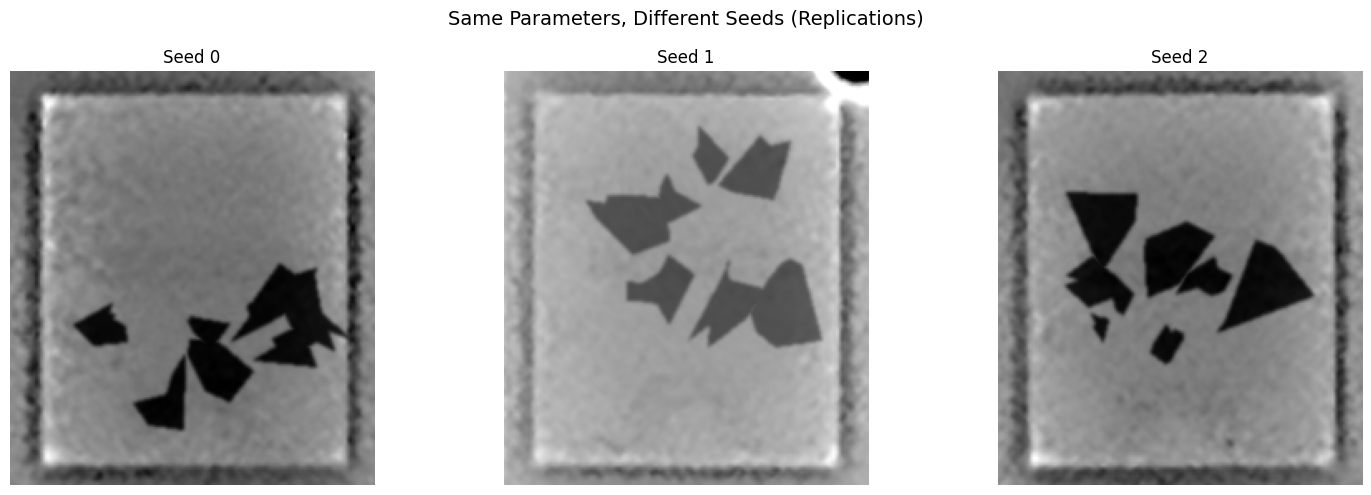

Note: Images should look similar but with different void positions/sizes due to stochastic parameters.


In [7]:
# Test replication - same params, different seeds
print("Testing replications with same parameters...\n")

test_param = {
    'void_shape': 'irregular',
    'void_count': 7,
    'base_size': 20.0,
    'brightness_factor': 0.5,
    'size_std': 6.0,
    'position_spread': 0.6
}

# Generate 3 replications
replication_images = []
for seed in [0, 1, 2]:
    img, _ = generator.generate_single(test_param, seed=seed)
    replication_images.append(img)

# Display replications
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Same Parameters, Different Seeds (Replications)', fontsize=14)

for idx, (ax, img) in enumerate(zip(axes, replication_images)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Seed {idx}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Note: Images should look similar but with different void positions/sizes due to stochastic parameters.")